# Colorectal Liver Metastases dataset: Exploratory Survival Analysis

## Importing the dataset and data preprocessing

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Colorectal-Liver-Metastases clinical data --> dataframe
df = pd.read_csv('Colorectal-Liver-Metastases-Clinical-data-April-2023.csv')

# Replacing the missing values with NaN
df.replace({-999: None}, regex=True, inplace=True)
df.replace({'-999': None}, regex=True, inplace=True)

# Auto-conversion of the columns' types
df = df.convert_dtypes()

# Setting the patients' ID as the index of the dataframe
df.set_index('Patient-ID', inplace=True)

In [3]:
# Colorectal-Liver-Metastases clinical data --> dataframe
seg_df = pd.read_csv('C:\\Users\\Luisa\\SynologyDrive\\Colorectal-Liver-Metastases_NIfTI\\seg_features.csv')

# Auto-conversion of the columns' types
seg_df = seg_df.convert_dtypes()

# Setting the patients' ID as the index of the dataframe
seg_df.set_index('Patient-ID', inplace=True)

df = pd.concat([df, seg_df], axis=1)

In [4]:
df.head()

,De-identify Scout Name,age,sex,major_comorbidity,body_mass_index,node_positive_primary,synchronous_crlm,multiple_metastases,clinrisk_score,clinrisk_stratified,...,months_to_DFS_progression,vital_status_DFS,progression_or_recurrence_liveronly,months_to_liver_DFS_progression,vital_status_liver_DFS,relevant_notes,liver_vol,remnant_vol,n_metastases,liver_TTV
Patient-ID,,,,,,,,,,,,,,,,,,,,,
CRLM-CT-1001,001_recurrence_preop,65,2,0,21.9,0,1,0,1,0,...,117.4,0,0,117.4,0,<NA>,1750.766593,1666.578087,1,1.074405
CRLM-CT-1002,002_recurrence_preop,63,1,0,23.7,1,1,0,2,0,...,13.8,1,1,13.8,1,<NA>,818.09631,679.059505,1,0.495558
CRLM-CT-1003,003_recurrence_preop,52,2,0,37.5,0,0,0,0,0,...,94.7,0,0,94.7,0,<NA>,2201.816986,2131.53728,1,2.311436
CRLM-CT-1004,004_recurrence_preop,39,1,1,22.1,1,1,1,3,1,...,92.0,0,0,92.0,0,<NA>,1288.863446,1246.317792,2,1.501798
CRLM-CT-1005,005_recurrence_preop,87,1,1,26.6,0,0,1,3,1,...,24.7,0,0,24.7,0,<NA>,1261.791978,931.980694,1,46.59158


In [5]:
# Printing the relevant notes if they exist
df[df['relevant_notes'].notnull()]['relevant_notes']

Patient-ID
CRLM-CT-1074    This patient was scanned on their stomach.
Name: relevant_notes, dtype: string

In [6]:
# Dropping extra information columns (not clinical variables)
df.drop(columns=['relevant_notes', 'De-identify Scout Name'], inplace=True)

In [7]:
# One Hot Encoding of variable 'sex'
df.insert(2, "sex_M", np.zeros(len(df)))
df.insert(3, "sex_F", np.zeros(len(df)))

# For each entry, if the Performance Index is equal or superior to 50, Academic Sucess will be True (1); Academic Sucess will be False (0) otherwise
for ind in df.index:
    if df.loc[ind, 'sex'] == 1:
        df.loc[ind, 'sex_M'] = 1
    elif df.loc[ind, 'sex'] == 2:
        df.loc[ind, 'sex_F'] = 1

df.drop(columns=['sex'], inplace=True)

In [8]:
df.head()

,age,sex_M,sex_F,major_comorbidity,body_mass_index,node_positive_primary,synchronous_crlm,multiple_metastases,clinrisk_score,clinrisk_stratified,...,progression_or_recurrence,months_to_DFS_progression,vital_status_DFS,progression_or_recurrence_liveronly,months_to_liver_DFS_progression,vital_status_liver_DFS,liver_vol,remnant_vol,n_metastases,liver_TTV
Patient-ID,,,,,,,,,,,,,,,,,,,,,
CRLM-CT-1001,65,0.0,1.0,0,21.9,0,1,0,1,0,...,0,117.4,0,0,117.4,0,1750.766593,1666.578087,1,1.074405
CRLM-CT-1002,63,1.0,0.0,0,23.7,1,1,0,2,0,...,1,13.8,1,1,13.8,1,818.09631,679.059505,1,0.495558
CRLM-CT-1003,52,0.0,1.0,0,37.5,0,0,0,0,0,...,0,94.7,0,0,94.7,0,2201.816986,2131.53728,1,2.311436
CRLM-CT-1004,39,1.0,0.0,1,22.1,1,1,1,3,1,...,0,92.0,0,0,92.0,0,1288.863446,1246.317792,2,1.501798
CRLM-CT-1005,87,1.0,0.0,1,26.6,0,0,1,3,1,...,0,24.7,0,0,24.7,0,1261.791978,931.980694,1,46.59158


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 197 entries, CRLM-CT-1001 to CRLM-CT-1198
Data columns (total 38 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   age                                  197 non-null    Int64  
 1   sex_M                                197 non-null    float64
 2   sex_F                                197 non-null    float64
 3   major_comorbidity                    197 non-null    Int64  
 4   body_mass_index                      197 non-null    Float64
 5   node_positive_primary                197 non-null    Int64  
 6   synchronous_crlm                     197 non-null    Int64  
 7   multiple_metastases                  197 non-null    Int64  
 8   clinrisk_score                       168 non-null    Int64  
 9   clinrisk_stratified                  168 non-null    Int64  
 10  carcinoembryonic_antigen             168 non-null    Float64
 11  max_tumor_size   

In [10]:
# Checking the percentage of missing values amongst the dataset
# Considering below 10% "safe" to perform missing value imputation
missing_val_pecent = ((len(df)-len(df.dropna(inplace=False)))/len(df))*100
print(f'Percentage of the dataset with missing values: {int(np.round(missing_val_pecent, decimals=0))}%')

Percentage of the dataset with missing values: 16%


In [11]:
# Dropping rows with missing values
df.dropna(inplace=True)

In [12]:
# Converting the clinical variables that refer to percentages to float (instead of string, e.g. '90%' to 0.9)
for i in df.select_dtypes('string').columns: df[i] = df[i].astype(object)

for ind in df.index:
    for var in list(df.select_dtypes(object).columns):
        df.loc[ind, var] = int(df.loc[ind, var].replace('%', ''))/100

df = df.convert_dtypes()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 166 entries, CRLM-CT-1001 to CRLM-CT-1195
Data columns (total 38 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   age                                  166 non-null    Int64  
 1   sex_M                                166 non-null    Int64  
 2   sex_F                                166 non-null    Int64  
 3   major_comorbidity                    166 non-null    Int64  
 4   body_mass_index                      166 non-null    Float64
 5   node_positive_primary                166 non-null    Int64  
 6   synchronous_crlm                     166 non-null    Int64  
 7   multiple_metastases                  166 non-null    Int64  
 8   clinrisk_score                       166 non-null    Int64  
 9   clinrisk_stratified                  166 non-null    Int64  
 10  carcinoembryonic_antigen             166 non-null    Float64
 11  max_tumor_size   

In [14]:
# Getting a statistical overview of the dataframe
df.describe()

,age,sex_M,sex_F,major_comorbidity,body_mass_index,node_positive_primary,synchronous_crlm,multiple_metastases,clinrisk_score,clinrisk_stratified,...,progression_or_recurrence,months_to_DFS_progression,vital_status_DFS,progression_or_recurrence_liveronly,months_to_liver_DFS_progression,vital_status_liver_DFS,liver_vol,remnant_vol,n_metastases,liver_TTV
count,166.0,166.0,166.0,166.0,166.0,166.0,166.0,166.0,166.0,166.0,...,166.0,166.0,166.0,166.0,166.0,166.0,166.0,166.0,166.0,166.0
mean,60.439759,0.572289,0.427711,0.554217,27.140964,0.355422,0.554217,0.572289,1.981928,0.307229,...,0.63253,42.975301,0.674699,0.385542,54.278313,0.596386,1607.275513,982.256401,2.698795,41.801512
std,11.931343,0.496244,0.496244,0.498556,4.971495,0.480089,0.498556,0.496244,0.981482,0.462741,...,0.483575,40.043292,0.469905,0.488196,40.065451,0.492106,443.636085,470.385383,3.014048,114.019697
min,30.0,0.0,0.0,0.0,17.2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.9,0.0,0.0,1.4,0.0,818.09631,221.80549,1.0,0.242398
25%,53.0,0.0,0.0,0.0,23.5,0.0,0.0,0.0,1.0,0.0,...,0.0,9.75,0.0,0.0,14.9,0.0,1292.11608,569.961933,1.0,3.819951
50%,62.0,1.0,0.0,1.0,26.55,0.0,1.0,1.0,2.0,0.0,...,1.0,22.85,1.0,0.0,51.5,1.0,1590.583418,936.612596,2.0,9.471394
75%,69.0,1.0,1.0,1.0,30.375,1.0,1.0,1.0,3.0,1.0,...,1.0,74.2,1.0,1.0,92.675,1.0,1797.752722,1321.468844,3.0,31.894716
max,88.0,1.0,1.0,1.0,44.3,1.0,1.0,1.0,5.0,1.0,...,1.0,131.6,1.0,1.0,131.6,1.0,3612.943028,2381.024425,35.0,1099.98105


In [15]:
# Overall survival: every case is considered
OS_df = df.drop(columns=['progression_or_recurrence', 'months_to_DFS_progression', 'vital_status_DFS',
                         'progression_or_recurrence_liveronly', 'months_to_liver_DFS_progression', 'vital_status_liver_DFS'])

# Disease-free survival: only patients which did not have recurrence of the disease are considered
DFS_df = df[df['progression_or_recurrence']==0].drop(columns=['overall_survival_months', 'vital_status',
                         'progression_or_recurrence_liveronly', 'months_to_liver_DFS_progression', 'vital_status_liver_DFS'])

# Liver disease-free survival: only patients which did not have recurrence of the disease in the liver are considered
liver_DFS_df = df[df['progression_or_recurrence_liveronly']==0].drop(columns=['overall_survival_months', 'vital_status'])

In [16]:
# Creating a structured array for the overall survival and associated vital status
OS_lst = []
for ind in OS_df.index:
    OS_lst.append((OS_df['vital_status'][ind], OS_df['overall_survival_months'][ind]))

OS_arr = np.array(OS_lst, dtype=[('status', bool), ('survival', float)])

# Creating a structured array for the disease-free survival and associated vital status
DFS_lst = []
for ind in DFS_df.index:
    DFS_lst.append((DFS_df['vital_status_DFS'][ind], DFS_df['months_to_DFS_progression'][ind]))

DFS_arr = np.array(DFS_lst, dtype=[('status', bool), ('survival', float)])

# Creating a structured array for the liver disease-free survival and associated vital status
liver_DFS_lst = []
for ind in liver_DFS_df.index:
    liver_DFS_lst.append((liver_DFS_df['months_to_liver_DFS_progression'][ind], liver_DFS_df['months_to_liver_DFS_progression'][ind]))

liver_DFS_arr = np.array(liver_DFS_lst, dtype=[('status', bool), ('survival', float)])

## Kaplan-Meier curves

In [17]:
from sksurv.nonparametric import kaplan_meier_estimator
import matplotlib.pyplot as plt

Text(0.5, 1.05, 'Kaplan-Meier curves')

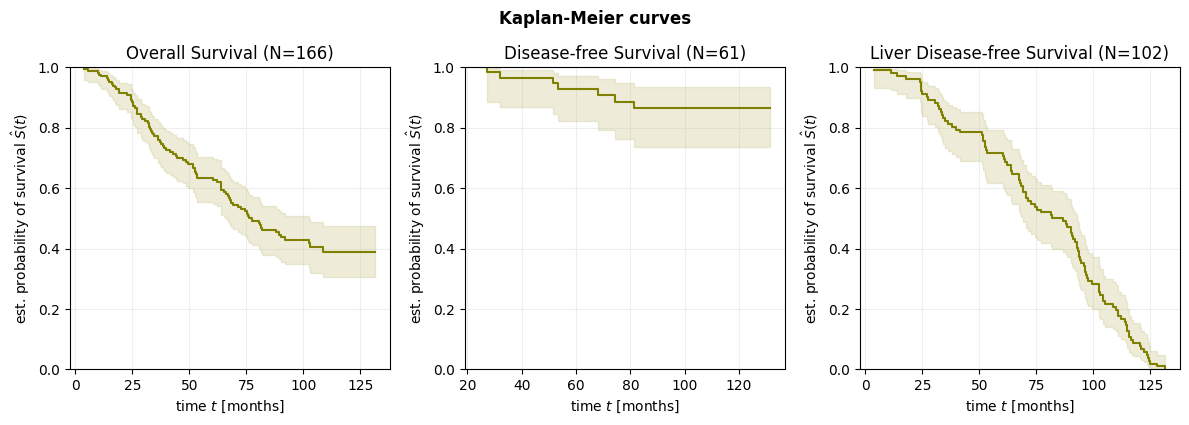

In [18]:
# Kaplan-Meier curves for the three types of survival considered
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(12, 4))
ax = ax.flat

for i, s in enumerate([OS_arr, DFS_arr, liver_DFS_arr]):
    time, survival_prob, conf_int = kaplan_meier_estimator(
        s['status'], s['survival'], conf_type="log-log"
    )
    
    ax[i].step(time, survival_prob, where="post", color='olive')
    ax[i].fill_between(time, conf_int[0], conf_int[1], alpha=0.25, step="post", color='darkkhaki')
    ax[i].set_ylim(0, 1)
    ax[i].set_ylabel(r"est. probability of survival $\hat{S}(t)$")
    ax[i].set_xlabel("time $t$ [months]")
    ax[i].grid(color='#EEEEEE')
    ax[i].set_axisbelow(True)

ax[0].set_title(f'Overall Survival (N={len(OS_arr)})')
ax[1].set_title(f'Disease-free Survival (N={len(DFS_arr)})')
ax[2].set_title(f'Liver Disease-free Survival (N={len(liver_DFS_arr)})')

fig.tight_layout()
fig.suptitle("Kaplan-Meier curves", y=1.05, fontweight="bold")

In [19]:
fig.savefig('Kaplan-Meier_curves_CRLM.png', dpi=fig.dpi)

## Multivariate Survival Analysis
https://scikit-survival.readthedocs.io/en/stable/user_guide/00-introduction.html

In [20]:
import seaborn as sns

from sksurv.linear_model import CoxPHSurvivalAnalysis, CoxnetSurvivalAnalysis
from sksurv.ensemble import RandomSurvivalForest
from sksurv.metrics import concordance_index_censored

from sklearn import set_config
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import warnings
from sklearn.exceptions import FitFailedWarning

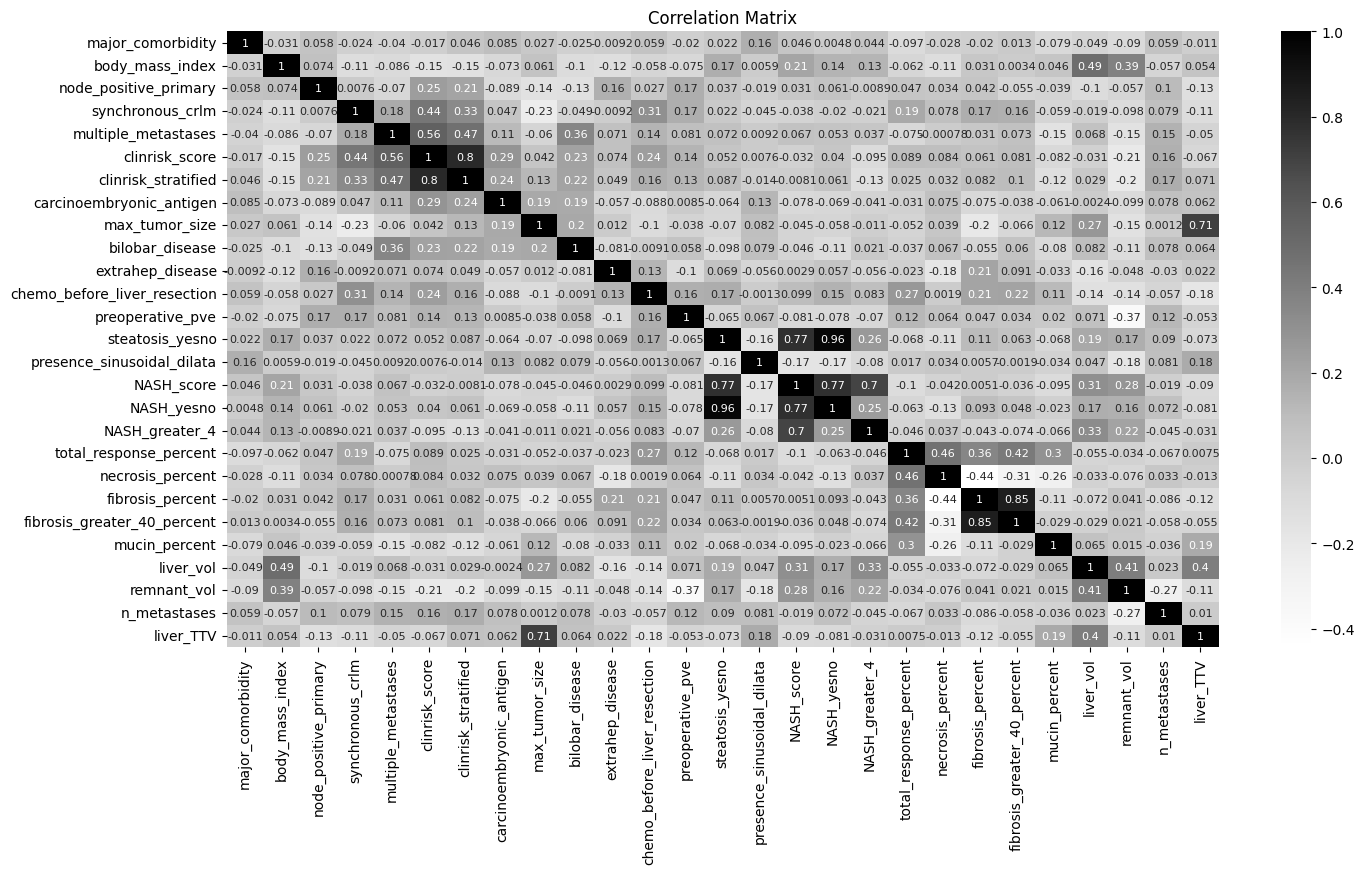

In [21]:
# Plotting the correlation matrix (Pearson's correlation coefficients)
corr = np.corrcoef(OS_df.drop(columns=['age', 'sex_M', 'sex_F', 'overall_survival_months', 'vital_status']).astype('float32').to_numpy().T)
corr_labels = list(OS_df.drop(columns=['age', 'sex_M', 'sex_F', 'overall_survival_months', 'vital_status']).columns)

plt.figure(figsize = (16,8))
sns.heatmap(corr, annot=True, annot_kws={"size":8}, cmap='Greys')
plt.title('Correlation Matrix')
plt.yticks(np.arange(0.5, 27.5, 1), labels=corr_labels, rotation=0)
plt.xticks(np.arange(0.5, 27.5, 1), labels=corr_labels, rotation=90)
plt.show()

In [22]:
# List with the variables which are strongly correlated (|r|>0.7) and sex_F (as sex_M and sex_F are perfectly inversely correlated)
drop_vars = ['sex_F', 'clinrisk_stratified', 'max_tumor_size', 'NASH_yesno', 'NASH_greater_4',
             'steatosis_yesno', 'fibrosis_greater_40_percent']

In [23]:
# Preparing the clinical variables for each survival type

# Overall survival: every case is considered
OS_var = df.drop(columns=drop_vars+['overall_survival_months', 'vital_status',
                          'progression_or_recurrence', 'months_to_DFS_progression', 'vital_status_DFS',
                          'progression_or_recurrence_liveronly', 'months_to_liver_DFS_progression', 'vital_status_liver_DFS'])

# Disease-free survival: only patients which did not have recurrence of the disease are considered
DFS_var = df[df['progression_or_recurrence']==0].drop(columns=drop_vars+['overall_survival_months', 'vital_status',
                          'progression_or_recurrence', 'months_to_DFS_progression', 'vital_status_DFS',
                          'progression_or_recurrence_liveronly', 'months_to_liver_DFS_progression', 'vital_status_liver_DFS'])

# Liver disease-free survival: only patients which did not have recurrence of the disease in the liver are considered
liver_DFS_var = df[df['progression_or_recurrence_liveronly']==0].drop(columns=drop_vars+['overall_survival_months', 'vital_status',
                          'progression_or_recurrence', 'months_to_DFS_progression', 'vital_status_DFS',
                          'progression_or_recurrence_liveronly', 'months_to_liver_DFS_progression', 'vital_status_liver_DFS'])

In [24]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(OS_var, OS_arr, test_size=0.20, random_state=1)

### Cox's Proportional Hazards (PH) model

In [25]:
# Cox proportional hazards model
set_config(display="text")  # displays text representation of estimators
estimator = CoxPHSurvivalAnalysis()
estimator.fit(X_train, y_train)

CoxPHSurvivalAnalysis()

In [26]:
# Printing the log hazard ratio for each variable
pd.Series(estimator.coef_, index=OS_var.columns)

age                              0.000768
sex_M                           -0.515875
major_comorbidity               -0.395616
body_mass_index                  0.043218
node_positive_primary            0.134665
synchronous_crlm                -0.653515
multiple_metastases              0.439484
clinrisk_score                   0.240208
carcinoembryonic_antigen         0.001890
bilobar_disease                  0.034202
extrahep_disease                 0.080739
chemo_before_liver_resection     0.686096
preoperative_pve                -0.415602
presence_sinusoidal_dilata       0.135964
NASH_score                      -0.178158
total_response_percent          15.986270
necrosis_percent               -16.674944
fibrosis_percent               -16.887074
mucin_percent                  -16.805357
liver_vol                       -0.000135
remnant_vol                     -0.000501
n_metastases                    -0.065904
liver_TTV                        0.001471
dtype: float64

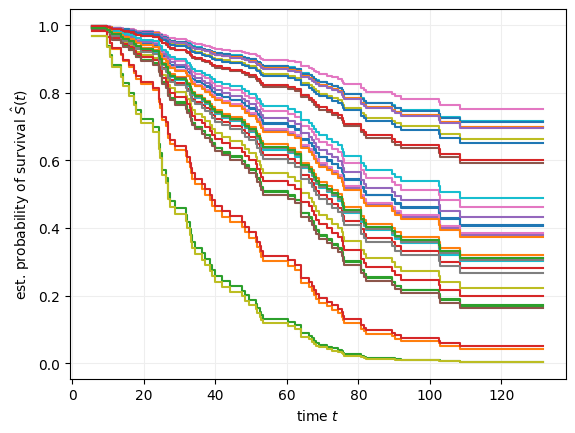

In [27]:
# Survival prediction of the test set
pred_surv = estimator.predict_survival_function(X_test) # Returns an array of step functions: x=array of time points; y=corresponding hazard

# Plotting the predictions
time_points = pred_surv[0].x
for i, surv_func in enumerate(pred_surv):
    #plt.step(time_points, surv_func(time_points), where="post", label=f"{list(X_test.index)[i]}")
    plt.step(time_points, surv_func(time_points), where="post")
plt.ylabel(r"est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
#plt.legend(loc="best")
plt.grid(color='#EEEEEE')

In [28]:
# Checking if the time point coincide between patients
for i, step_function in enumerate(pred_surv):
    if i>=1:
        if step_function.x.all() != pred_surv[i-1].x.all():
            print(True)

In [29]:
# Calculating the C-Index on the test set
pred_hazards = estimator.predict(X_test)
cindex, concordant, discordant, tied_risk, tied_time = concordance_index_censored(y_test['status'], y_test['survival'], pred_hazards)
print(f'C-Index on the test set: {cindex}')

C-Index on the test set: 0.5518763796909493


In [30]:
# Model's performance (fitted on all considered variables)
print(f'Model fitted with {list(X_train.columns)}')
print(f'C-Index on the training set: {estimator.score(X_train, y_train)}')
print(f'C-Index on the test set: {estimator.score(X_test, y_test)}')

Model fitted with ['age', 'sex_M', 'major_comorbidity', 'body_mass_index', 'node_positive_primary', 'synchronous_crlm', 'multiple_metastases', 'clinrisk_score', 'carcinoembryonic_antigen', 'bilobar_disease', 'extrahep_disease', 'chemo_before_liver_resection', 'preoperative_pve', 'presence_sinusoidal_dilata', 'NASH_score', 'total_response_percent', 'necrosis_percent', 'fibrosis_percent', 'mucin_percent', 'liver_vol', 'remnant_vol', 'n_metastases', 'liver_TTV']
C-Index on the training set: 0.7058623619371283
C-Index on the test set: 0.5518763796909493


In [31]:
# Fitting the Cox's proportional hazards model to each variable and checking the C-Index (amongst the training set)
n_features = X_train.values.shape[1]
scores = np.empty(n_features)
m = CoxPHSurvivalAnalysis()
for j in range(n_features):
    Xj = X_train.values[:, j : j + 1]
    m.fit(Xj, y_train)
    scores[j] = m.score(Xj, y_train)
    # Below is the code to calculate the score on the test set; however, as not to bias the results, it should be done on a validation set
    # Above is the code to calculate the score on the training set: the one where each model was fitted
    #Xj_test = X_test.values[:, j : j + 1]
    #scores[j] = m.score(Xj_test, y_test)

scores_series = pd.Series(scores, index=X_train.columns).sort_values(ascending=False)
scores_series

carcinoembryonic_antigen        0.621580
liver_TTV                       0.616483
clinrisk_score                  0.593458
remnant_vol                     0.576890
multiple_metastases             0.572218
chemo_before_liver_resection    0.554545
sex_M                           0.550892
NASH_score                      0.550042
bilobar_disease                 0.536619
total_response_percent          0.529482
major_comorbidity               0.528292
liver_vol                       0.525743
age                             0.519796
extrahep_disease                0.516483
synchronous_crlm                0.516058
node_positive_primary           0.513254
mucin_percent                   0.511215
necrosis_percent                0.509346
preoperative_pve                0.506627
presence_sinusoidal_dilata      0.503908
body_mass_index                 0.492863
fibrosis_percent                0.479949
n_metastases                    0.452931
dtype: float64

In [32]:
# Selecting the best variables: score higher than a given threshold
threshold = 0.6

best_vars = []
for (index, value) in scores_series.items():
    if value>=threshold:
        best_vars.append(index)

print(f'The best variables (C-Index>={threshold}) are: {best_vars}')

The best variables (C-Index>=0.6) are: ['carcinoembryonic_antigen', 'liver_TTV']


In [33]:
# Cox proportional hazards model
set_config(display="text")  # displays text representation of estimators
new_estimator = CoxPHSurvivalAnalysis()
new_estimator.fit(X_train[best_vars], y_train)

print(f'C-Index on the training set: {new_estimator.score(X_train[best_vars], y_train)}')
print(f'C-Index on the test set: {new_estimator.score(X_test[best_vars], y_test)}')

C-Index on the training set: 0.6107051826677995
C-Index on the test set: 0.5231788079470199


In [34]:
# Function used to test the model of different numbers of features
# Code from sksurv tutorial:
# (https://scikit-survival.readthedocs.io/en/stable/user_guide/00-introduction.html#Feature-Selection:-Which-Variable-is-Most-Predictive?)
def fit_and_score_features_CoxPH(X, y):
    n_features = X.shape[1]
    scores = np.empty(n_features)
    m = CoxPHSurvivalAnalysis()
    for j in range(n_features):
        Xj = X[:, j : j + 1]
        m.fit(Xj, y)
        scores[j] = m.score(Xj, y)
    return scores

In [35]:
pipeline_CoxPH = Pipeline([
    #("scale", MinMaxScaler()),
    ("select", SelectKBest(fit_and_score_features_CoxPH, k="all")),
    ("model", CoxPHSurvivalAnalysis())
    ])

In [36]:
# Grid search with cross validation for the different number of features to use when fitting the model
param_grid = {"select__k": np.arange(1, OS_var.shape[1] + 1)}
cv = KFold(n_splits=5, random_state=1, shuffle=True)

# Cox PH model feature selection grid search with cross validation
gscv_CoxPH = GridSearchCV(pipeline_CoxPH, param_grid, return_train_score=True, cv=cv, error_score='raise')
gscv_CoxPH.fit(X_train, y_train)

gscv_results_CoxPH = pd.DataFrame(gscv_CoxPH.cv_results_).sort_values(by="mean_test_score", ascending=False)
gscv_results_CoxPH.set_index('param_select__k', inplace=True)
gscv_results_CoxPH.loc[:, ~gscv_results_CoxPH.columns.str.endswith("_time")]

,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
param_select__k,,,,,,,,,,,,,,,,
2,{'select__k': 2},0.539419,0.641414,0.578947,0.588,0.492386,0.568033,0.049888,1,0.612615,0.594376,0.619553,0.628160,0.656715,0.622284,0.020493
12,{'select__k': 12},0.539419,0.616162,0.574899,0.540,0.461929,0.546482,0.050801,2,0.707093,0.653736,0.683551,0.695026,0.680164,0.683914,0.017808
18,{'select__k': 18},0.576763,0.661616,0.497976,0.564,0.431472,0.546365,0.077537,3,0.713319,0.699037,0.714052,0.705627,0.727832,0.711973,0.009646
6,{'select__k': 6},0.568465,0.666667,0.502024,0.476,0.517766,0.546184,0.067373,4,0.656470,0.621453,0.645153,0.663496,0.654280,0.648170,0.014588
10,{'select__k': 10},0.506224,0.671717,0.534413,0.516,0.492386,0.544148,0.065236,5,0.691121,0.651653,0.670752,0.684425,0.681445,0.675879,0.013780
13,{'select__k': 13},0.597510,0.631313,0.489879,0.532,0.461929,0.542526,0.063694,6,0.710883,0.656339,0.699891,0.695569,0.679908,0.688518,0.018915
17,{'select__k': 17},0.564315,0.621212,0.502024,0.572,0.441624,0.540235,0.062178,7,0.714402,0.695652,0.717320,0.704811,0.725782,0.711593,0.010413
20,{'select__k': 20},0.564315,0.636364,0.497976,0.548,0.446701,0.538671,0.063880,8,0.716026,0.702942,0.712691,0.702637,0.728857,0.712630,0.009681
15,{'select__k': 15},0.564315,0.666667,0.481781,0.524,0.451777,0.537708,0.074884,9,0.715755,0.699297,0.711874,0.701549,0.726550,0.711005,0.009914


In [37]:
# Getting the optimal features to fit the Cox PH model
best_k_CoxPH = gscv_results_CoxPH['mean_test_score'].idxmax()

In [38]:
# Cox proportional hazards model fitted with the k most predictive variables
set_config(display="text")  # displays text representation of estimators
gscv_estimator_CoxPH = CoxPHSurvivalAnalysis()
gscv_vars_CoxPH = list(scores_series.index)[:best_k_CoxPH]
gscv_estimator_CoxPH.fit(X_train[gscv_vars_CoxPH], y_train)

print(f'Model fitted with {gscv_vars_CoxPH}')
print(f"C-Index on the training set: {gscv_estimator_CoxPH.score(X_train[gscv_vars_CoxPH], y_train)}")
print(f"C-Index on the test set: {gscv_estimator_CoxPH.score(X_test[gscv_vars_CoxPH], y_test)}")

Model fitted with ['carcinoembryonic_antigen', 'liver_TTV']
C-Index on the training set: 0.6107051826677995
C-Index on the test set: 0.5231788079470199


### Penalised Cox Models: LASSO

https://scikit-survival.readthedocs.io/en/stable/user_guide/coxnet.html

In [39]:
# Cox LASSO model
lasso_estimator = CoxnetSurvivalAnalysis(l1_ratio=1.0, alpha_min_ratio=0.01)
lasso_estimator.fit(X_train, y_train)

CoxnetSurvivalAnalysis(alpha_min_ratio=0.01, l1_ratio=1.0)

In [40]:
print(f"C-Index on the training set: {lasso_estimator.score(X_train, y_train)}")
print(f"C-Index on the test set: {lasso_estimator.score(X_test, y_test)}")

C-Index on the training set: 0.6076465590484282
C-Index on the test set: 0.5342163355408388


In [41]:
# Getting the coefficients of each covariate for different alpha values
coefficients_lasso = pd.DataFrame(lasso_estimator.coef_, index=X_train.columns, columns=np.round(lasso_estimator.alphas_, 5))

In [42]:
# Making a pipeline to find the best alpha
coxnet_pipe = make_pipeline(
    StandardScaler(),
    CoxnetSurvivalAnalysis(l1_ratio=0.9, alpha_min_ratio=0.01, max_iter=100))
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FitFailedWarning)
coxnet_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('coxnetsurvivalanalysis',
                 CoxnetSurvivalAnalysis(alpha_min_ratio=0.01, l1_ratio=0.9,
                                        max_iter=100))])

In [43]:
# Grid Search with 5-fold CV for finding the best alpha
estimated_alphas = coxnet_pipe.named_steps["coxnetsurvivalanalysis"].alphas_
cv = KFold(n_splits=5, shuffle=True, random_state=0)
gscv_LASSO = GridSearchCV(
    make_pipeline(StandardScaler(), CoxnetSurvivalAnalysis(l1_ratio=0.9)),
    param_grid={"coxnetsurvivalanalysis__alphas": [[v] for v in estimated_alphas]},
    cv=cv,
    error_score=0.5,
    n_jobs=1,
).fit(X_train, y_train)

gscv_results_LASSO = pd.DataFrame(gscv_LASSO.cv_results_)

In [44]:
coxnet_pred = make_pipeline(StandardScaler(), CoxnetSurvivalAnalysis(l1_ratio=0.9, fit_baseline_model=True))
coxnet_pred.set_params(**gscv_LASSO.best_params_)
coxnet_pred.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('coxnetsurvivalanalysis',
                 CoxnetSurvivalAnalysis(alphas=[0.023368484082364166],
                                        fit_baseline_model=True,
                                        l1_ratio=0.9))])

In [45]:
print(f"Best alpha value for the LASSO model: {gscv_LASSO.best_params_['coxnetsurvivalanalysis__alphas'][0]}")

Best alpha value for the LASSO model: 0.023368484082364166


In [46]:
print(f'Model fitted with {X_train.columns}')
print(f"C-Index on the training set: {coxnet_pred.score(X_train, y_train)}")
print(f"C-Index on the test set: {coxnet_pred.score(X_test, y_test)}")

Model fitted with Index(['age', 'sex_M', 'major_comorbidity', 'body_mass_index',
       'node_positive_primary', 'synchronous_crlm', 'multiple_metastases',
       'clinrisk_score', 'carcinoembryonic_antigen', 'bilobar_disease',
       'extrahep_disease', 'chemo_before_liver_resection', 'preoperative_pve',
       'presence_sinusoidal_dilata', 'NASH_score', 'total_response_percent',
       'necrosis_percent', 'fibrosis_percent', 'mucin_percent', 'liver_vol',
       'remnant_vol', 'n_metastases', 'liver_TTV'],
      dtype='object')
C-Index on the training set: 0.7062022090059473
C-Index on the test set: 0.5695364238410596


In [47]:
best_model = gscv_LASSO.best_estimator_.named_steps["coxnetsurvivalanalysis"]
best_coefs = pd.DataFrame(best_model.coef_, index=X_train.columns, columns=["coefficient"])

non_zero = np.sum(best_coefs.iloc[:, 0] != 0)
print(f"Number of non-zero coefficients: {non_zero}")

print(f"Which are: {best_coefs.query('coefficient != 0')}")

Number of non-zero coefficients: 16
Which are:                               coefficient
sex_M                           -0.164374
major_comorbidity               -0.105445
body_mass_index                  0.086010
synchronous_crlm                -0.280476
multiple_metastases              0.139826
clinrisk_score                   0.244854
carcinoembryonic_antigen         0.158181
extrahep_disease                 0.004369
chemo_before_liver_resection     0.253811
preoperative_pve                -0.069035
NASH_score                      -0.114769
total_response_percent          -0.107443
fibrosis_percent                -0.033376
remnant_vol                     -0.171171
n_metastases                    -0.085477
liver_TTV                        0.097208


### Random Survival Forests

In [48]:
rsf_estimator = RandomSurvivalForest(
    n_estimators=500, min_samples_split=10, min_samples_leaf=15, n_jobs=-1, random_state=42
)
rsf_estimator.fit(X_train, y_train)

RandomSurvivalForest(min_samples_leaf=15, min_samples_split=10,
                     n_estimators=500, n_jobs=-1, random_state=42)

In [49]:
print(f'Model fitted with {X_train.columns}')
print(f"C-Index on the training set: {rsf_estimator.score(X_train, y_train)}")
print(f"C-Index on the test set: {rsf_estimator.score(X_test, y_test)}")

Model fitted with Index(['age', 'sex_M', 'major_comorbidity', 'body_mass_index',
       'node_positive_primary', 'synchronous_crlm', 'multiple_metastases',
       'clinrisk_score', 'carcinoembryonic_antigen', 'bilobar_disease',
       'extrahep_disease', 'chemo_before_liver_resection', 'preoperative_pve',
       'presence_sinusoidal_dilata', 'NASH_score', 'total_response_percent',
       'necrosis_percent', 'fibrosis_percent', 'mucin_percent', 'liver_vol',
       'remnant_vol', 'n_metastases', 'liver_TTV'],
      dtype='object')
C-Index on the training set: 0.7597281223449448
C-Index on the test set: 0.5827814569536424


In [50]:
# Function used to test the model of different numbers of features
# Code from sksurv tutorial:
# (https://scikit-survival.readthedocs.io/en/stable/user_guide/00-introduction.html#Feature-Selection:-Which-Variable-is-Most-Predictive?)
def fit_and_score_features_RSF(X, y):
    n_features = X.shape[1]
    scores = np.empty(n_features)
    m = RandomSurvivalForest(n_estimators=500, min_samples_split=10, min_samples_leaf=15, n_jobs=-1, random_state=42)
    for j in range(n_features):
        Xj = X[:, j : j + 1]
        m.fit(Xj, y)
        scores[j] = m.score(Xj, y)
    return scores

In [51]:
pipeline_RSF = Pipeline([
    ("scale", StandardScaler()),
    ("select", SelectKBest(fit_and_score_features_RSF, k="all")),
    ("model", RandomSurvivalForest(n_estimators=500, min_samples_split=10, min_samples_leaf=15, n_jobs=-1, random_state=42))
    ])

In [ ]:
# Grid search with cross validation for the different number of features to use when fitting the RSF model
gscv_RSF = GridSearchCV(pipeline_RSF, param_grid, return_train_score=True, cv=cv, error_score='raise')
gscv_RSF.fit(X_train, y_train)

gscv_results_RSF = pd.DataFrame(gscv_RSF.cv_results_).sort_values(by="mean_test_score", ascending=False)
gscv_results_RSF.set_index('param_select__k', inplace=True)
gscv_results_RSF.loc[:, ~gscv_results_RSF.columns.str.endswith("_time")]

In [ ]:
# Getting the optimal features to fit the RSF model
best_k_RSF = gscv_results_RSF['mean_test_score'].idxmax()

In [ ]:
# RSF model fitted with the k most predictive variables
set_config(display="text")  # displays text representation of estimators
gscv_estimator_RSF = RandomSurvivalForest(n_estimators=1000, min_samples_split=10, min_samples_leaf=15, n_jobs=-1, random_state=42)
gscv_vars_RSF = list(scores_series.index)[:best_k_RSF]
gscv_estimator_RSF.fit(X_train[gscv_vars_RSF], y_train)

print(f'Model fitted with {gscv_vars_RSF}')
print(f"C-Index on the training set: {gscv_estimator_RSF.score(X_train[gscv_vars_RSF], y_train)}")
print(f"C-Index on the test set: {gscv_estimator_RSF.score(X_test[gscv_vars_RSF], y_test)}")

In [ ]:
# Hyperparameter optimisation using Grid Search CV !

## Using the PyCox package

In [ ]:
import torch
#import torchtuples as tt
#from sklearn_pandas import DataFrameMapper
#from pycox.models import LogisticHazard
#from pycox.models import CoxPH

#### LogisticHazard (Nnet-survival)

https://nbviewer.org/github/havakv/pycox/blob/master/examples/01_introduction.ipynb

Error! `TypeError: Cannot interpret 'Float64Dtype()' as a data type` when `y_train = labtrans.fit_transform(*get_target(df_train))`

#### DeepSurv

https://nbviewer.org/github/havakv/pycox/blob/master/examples/cox-ph.ipynb

Error! `ValueError: All objects in 'data' doest have the same type.` when `lrfinder = deepsurv_model.lr_finder(x_train, y_train, batch_size, tolerance=10)`

## PyRadiomics for CT liver segmentation feature extraction

https://github.com/AIM-Harvard/pyradiomics/blob/master/notebooks/PyRadiomicsExample.ipynb

In [ ]:
import os

In [ ]:
CTPath = 'C:\\Users\\Luisa\\SynologyDrive\\Colorectal-Liver-Metastases_NIfTI\\CT\\'
SEGPath = 'C:\\Users\\Luisa\\SynologyDrive\\Colorectal-Liver-Metastases_NIfTI\\SEG\\'
featFile = '1_resized_pyradiomics.csv'

IDs = sorted(os.listdir(SEGPath))

In [ ]:
# Getting the PyRadiomics Features in a DataFrame
for i, ID in enumerate(IDs):
    featPath = os.path.join(SEGPath, ID, featFile)
    if i == 0:
        pyrad_df = pd.read_csv(featPath)
    else:
        new_line = pd.read_csv(featPath)
        pyrad_df = pd.concat([pyrad_df, new_line])

pyrad_df.set_index('Patient-ID', inplace=True)

In [ ]:
X_train_pyrad = pd.concat([X_train, pyrad_df.loc[X_train.index, :]], axis=1)
X_test_pyrad = pd.concat([X_test, pyrad_df.loc[X_test.index, :]], axis=1)

In [ ]:
set_config(display="text")  # displays text representation of estimators
estimator_LASSO_pyrad = CoxnetSurvivalAnalysis(l1_ratio=1.0, alpha_min_ratio=0.01)
estimator_LASSO_pyrad.fit(X_train_pyrad, y_train)

print(f'Model fitted with {X_train_pyrad.columns}')
print(f"C-Index on the training set: {estimator_LASSO_pyrad.score(X_train_pyrad, y_train)}")
print(f"C-Index on the test set: {estimator_LASSO_pyrad.score(X_test_pyrad, y_test)}")

In [ ]:
# RSF model fitted with the k most predictive variables
set_config(display="text")  # displays text representation of estimators
estimator_RSF_pyrad = RandomSurvivalForest(n_estimators=1000, min_samples_split=10, min_samples_leaf=15, n_jobs=-1, random_state=42)
estimator_RSF_pyrad.fit(X_train_pyrad, y_train)

print(f'Model fitted with {X_train_pyrad.columns}')
print(f"C-Index on the training set: {estimator_RSF_pyrad.score(X_train_pyrad, y_train)}")
print(f"C-Index on the test set: {estimator_RSF_pyrad.score(X_test_pyrad, y_test)}")

In [ ]:
pipeline_RSF = Pipeline([
    ("scale", StandardScaler()),
    ("select", SelectKBest(fit_and_score_features_RSF, k="all")),
    ("model", RandomSurvivalForest(n_estimators=1000, min_samples_split=10, min_samples_leaf=15, n_jobs=-1, random_state=42))
    ])

In [ ]:
# Grid search with cross validation for the different number of features to use when fitting the RSF model
gscv_RSF_pyrad = GridSearchCV(pipeline_RSF, param_grid, return_train_score=True, cv=cv, error_score='raise')
gscv_RSF_pyrad.fit(X_train_pyrad, y_train)

gscv_results_RSF_pyrad = pd.DataFrame(gscv_RSF_pyrad.cv_results_).sort_values(by="mean_test_score", ascending=False)
gscv_results_RSF_pyrad.set_index('param_select__k', inplace=True)
gscv_results_RSF_pyrad.loc[:, ~gscv_results_RSF_pyrad.columns.str.endswith("_time")]

In [ ]:
best_k_RSF_pyrad = gscv_results_RSF_pyrad['mean_test_score'].idxmax()

In [ ]:
gscv_vars_RSF_pyrad = list(scores_series.index)[:best_k_RSF_pyrad]

In [ ]:
# RSF model fitted with the k most predictive variables
set_config(display="text")  # displays text representation of estimators
gscv_estimator_RSF_pyrad = RandomSurvivalForest(n_estimators=1000, min_samples_split=10, min_samples_leaf=15, n_jobs=-1, random_state=42)
gscv_vars_RSF_pyrad = list(scores_series.index)[:best_k_RSF_pyrad]
gscv_estimator_RSF_pyrad.fit(X_train[gscv_vars_RSF_pyrad], y_train)

print(f'Model fitted with {gscv_vars_RSF_pyrad}')
print(f"C-Index on the training set: {gscv_estimator_RSF_pyrad.score(X_train_pyrad[gscv_vars_RSF_pyrad], y_train)}")
print(f"C-Index on the test set: {gscv_estimator_RSF_pyrad.score(X_test_pyrad[gscv_vars_RSF_pyrad], y_test)}")

## Preliminary Deep-learning-based Approach

In [ ]:
in_features = 55
out_features = 32

In [ ]:
net = torch.nn.Sequential(
    torch.nn.Linear(in_features, 64),
    torch.nn.ReLU(),
    torch.nn.BatchNorm1d(64),
    torch.nn.Dropout(0.1),
    
    torch.nn.Linear(64, 32),
    torch.nn.ReLU(),
    torch.nn.BatchNorm1d(32),
    torch.nn.Dropout(0.1),
    
    torch.nn.Linear(32, out_features)
)